<a href="https://colab.research.google.com/github/arka57/CNN/blob/main/CNN1_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. 
The test batch contains exactly 1000 randomly-selected images from each class. 
The training batches contain the remaining images in random order, but some training batches 
may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#DataLoading

In [2]:
import torchvision #library for computer vision related tasks in pytorch
import torchvision.transforms as transforms #for applying transformations on the data like converting to tensor

train=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
#The dataset is divided into 5 batches of data

In [4]:
trainloader=torch.utils.data.DataLoader(train,batch_size=4,shuffle=True)#loading the data in batch sizes of 4. Everytime we call dataloader 4 images will be given. Shuffle for randomness

In [5]:
dataiter=iter(trainloader)#for iterating trainloader. Here dataiter will have 1 batch of data of 4 images

In [6]:
images,labels=dataiter.next()

In [12]:
print(images.shape) #4-batch size, 3X32X32 dimensions for a RGB image
print(images[0].shape)#shape of 1st image in batch size of 4
print(labels[0].item())#label of first image in the batch

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
6


In [14]:
#Visualize image
#img is having 1st image from the batch. It is a tensor
img=images[0]
print(type(img))




<class 'torch.Tensor'>


In [15]:
#Converting tensor to numpy

npimg=img.numpy()
print(type(npimg))
print(npimg.shape)

<class 'numpy.ndarray'>
(3, 32, 32)


In [16]:
#to plot image  dimension should be like (32,32,3). So will transform the axes

npimg=np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


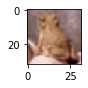

In [17]:
plt.figure(figsize=(1,1)) 
plt.imshow(npimg)
plt.show()

#image is frog same as label 6

In [18]:
#Creating a method for it

def show(img):
    img=img.numpy()
    img=np.transpose(img,(1,2,0))
    plt.imshow(img)
    plt.show()

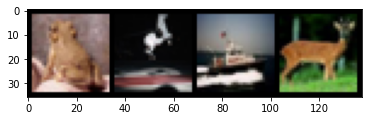

frog        horse        ship        deer


In [27]:
show(torchvision.utils.make_grid(images))
print('        '.join(classes[labels[j]] for j in range(4)))

In [ ]:
#Single Layer CNN

In [31]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def  __init__(self):
        super(FirstCNN,self).__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(3,16,(3,3),padding=(1,1),stride=(2,2))
        )

    def forward(self,x):
        x=self.conv1(x)
        return x    

In [32]:
net=FirstCNN()
output=net.forward(images)

In [33]:
print(output.shape)

torch.Size([4, 16, 16, 16])


In [35]:
#parameters of the network
#1st line-no of weights(coming from filters)
#2nd line-bias of filter. 1 bias per filter
for i in net.parameters():
    print(i.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [36]:
output1=output[0:0:,:,:].detach().numpy()
print(output1.shape)

(0, 16, 16, 16)


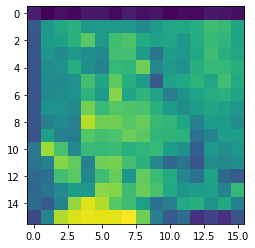

In [37]:
plt.imshow(output[0, 0, :, :].detach().numpy())
plt.show()

In [ ]:
#CNN with avgpool

class FirstCNN1(nn.Module):
    def __init__(self):
        super(FirstCNN1,self).__init__()
        self.model=nn.Sequential(
            Conv2D()
        )
